<a href="https://colab.research.google.com/github/azeem110201/song_generator/blob/master/song_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
text = 'Khamoshiyan aawaaz hain Tum sun’ne to aao kabhi Chhukar tumhe khill jaayengi Ghar inko bulaao kabhi Beqarar hain baat karne ko Kehne do inko zaraa Khamoshiyan.. teri meri khamoshiyan Khamoshiyan.. lipti hui khamoshiyan Kya uss gali mein kabhi tera jaana hua Jahaan se zamaane ko guzre zamaana hua Mera samay toh wahin pe hai thehra hua Bataaun tumhe kya mere sath kya kya hua Khamoshiyan ek saaz hai Tum dhun koi laao zaraa Khamoshiyan alfaaz hain Kabhi aa gunguna le zara Beqarar hain baat karne ko Kehne do inko zaraa.. haa.. Khamoshiyan.. teri meri khamoshiyan Khamoshiyan.. lipti hui khamoshiyan Nadiya ka paani bhi khamosh behta yahaan Khili chandani mein chhipi lakh khamoshiyan Baarish ki boondon ki hoti kahaan hai zubaan Sulagte dilon mein hai khamosh uthta dhuaan Khamoshiyan aakaash hai Tum udne toh aao zara Khamoshiyan ehsaas hai Tumhe mehsoos hoti hai kya Beqarar hain baat karne ko Kehne do inko zara.. haa..'

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [0]:
tokenzier = Tokenizer()

In [0]:
corpus = text.lower().split('\n')

In [0]:
tokenzier.fit_on_texts(corpus)

In [0]:
word_index = tokenzier.word_index

In [0]:
total_len = len(word_index) + 1

In [0]:
total_len

85

In [0]:
word_index

{'aa': 60,
 'aakaash': 81,
 'aao': 19,
 'aawaaz': 29,
 'alfaaz': 59,
 'baarish': 73,
 'baat': 12,
 'bataaun': 51,
 'behta': 67,
 'beqarar': 11,
 'bhi': 66,
 'boondon': 74,
 'bulaao': 36,
 'chandani': 70,
 'chhipi': 71,
 'chhukar': 32,
 'dhuaan': 80,
 'dhun': 56,
 'dilon': 78,
 'do': 15,
 'ehsaas': 83,
 'ek': 54,
 'gali': 38,
 'ghar': 35,
 'gunguna': 61,
 'guzre': 44,
 'haa': 25,
 'hai': 2,
 'hain': 3,
 'hoti': 28,
 'hua': 8,
 'hui': 23,
 'inko': 6,
 'jaana': 40,
 'jaayengi': 34,
 'jahaan': 41,
 'ka': 64,
 'kabhi': 5,
 'kahaan': 75,
 'karne': 13,
 'kehne': 14,
 'khamosh': 26,
 'khamoshiyan': 1,
 'khili': 69,
 'khill': 33,
 'ki': 27,
 'ko': 7,
 'koi': 57,
 'kya': 4,
 'laao': 58,
 'lakh': 72,
 'le': 62,
 'lipti': 22,
 'mehsoos': 84,
 'mein': 17,
 'mera': 46,
 'mere': 52,
 'meri': 21,
 'nadiya': 63,
 'paani': 65,
 'pe': 49,
 'saaz': 55,
 'samay': 47,
 'sath': 53,
 'se': 42,
 'sulagte': 77,
 'sun’ne': 30,
 'tera': 39,
 'teri': 20,
 'thehra': 50,
 'to': 31,
 'toh': 24,
 'tum': 9,
 'tumhe': 1

In [0]:
input_sequences = []

for line in corpus:
    token_list = tokenzier.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        print(n_gram_sequence)
        input_sequences.append(n_gram_sequence)

[1, 29]
[1, 29, 3]
[1, 29, 3, 9]
[1, 29, 3, 9, 30]
[1, 29, 3, 9, 30, 31]
[1, 29, 3, 9, 30, 31, 19]
[1, 29, 3, 9, 30, 31, 19, 5]
[1, 29, 3, 9, 30, 31, 19, 5, 32]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3, 12]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3, 12, 13]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3, 12, 13, 7]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3, 12, 13, 7, 14]
[1, 29, 3, 9, 30, 31, 19, 5, 32, 10, 33, 34, 35, 6, 36, 5, 11, 3, 12,

In [0]:
max_sequence_len = max([len(x) for x in input_sequences])

In [0]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len))

In [0]:
model = Sequential()

model.add(Embedding(total_len,96,input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_len,activation='softmax'))

In [0]:
model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 152, 96)           8160      
_________________________________________________________________
bidirectional (Bidirectional (None, 152, 128)          82432     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 85)                21845     
Total params: 375,605
Trainable params: 375,605
Non-trainable params: 0
_________________________________________________________________


In [0]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
xs[2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  3],
      dtype=int32)

In [0]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_len)

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9999):
      print("\nReached 100% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()      

In [0]:
history = model.fit(xs,ys,epochs=300,batch_size=64,callbacks=[callbacks])

Epoch 1/300
3/3 [==============================] - 0s 35ms/step - loss: 4.4422 - accuracy: 0.0658
Epoch 2/300
3/3 [==============================] - 0s 33ms/step - loss: 4.4166 - accuracy: 0.0855
Epoch 3/300
3/3 [==============================] - 0s 33ms/step - loss: 4.3663 - accuracy: 0.0855
Epoch 4/300
3/3 [==============================] - 0s 28ms/step - loss: 4.2831 - accuracy: 0.0855
Epoch 5/300
3/3 [==============================] - 0s 27ms/step - loss: 4.2268 - accuracy: 0.0855
Epoch 6/300
3/3 [==============================] - 0s 27ms/step - loss: 4.1746 - accuracy: 0.0855
Epoch 7/300
3/3 [==============================] - 0s 27ms/step - loss: 4.1410 - accuracy: 0.0855
Epoch 8/300
3/3 [==============================] - 0s 27ms/step - loss: 4.1025 - accuracy: 0.0921
Epoch 9/300
3/3 [==============================] - 0s 28ms/step - loss: 4.0265 - accuracy: 0.0855
Epoch 10/300
3/3 [==============================] - 0s 27ms/step - loss: 3.9472 - accuracy: 0.0921
Epoch 11/300
3/3 [=

In [0]:
import matplotlib.pyplot as plt

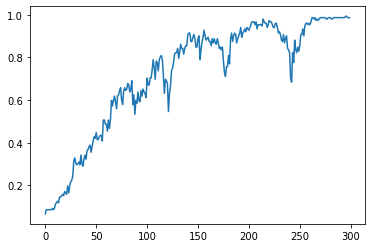

In [0]:
plt.plot(history.history['accuracy'])
plt.show()

In [0]:
seed_text = 'Mera samay'
next_word = 200

In [0]:
for _ in range(0,next_word):
    token_list = tokenzier.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len - 1)
    predicated = model.predict_classes(token_list,verbose=0)
    output_word = ""
    for word,index in word_index.items():
        if index == predicated:
            output_word = word
            break
    seed_text += " " + output_word

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
print(seed_text)

Mera samay hain tum sun’ne sun’ne to aao kabhi chhukar tumhe khill jaayengi ghar inko bulaao kabhi beqarar hain baat karne ko kehne do inko zaraa khamoshiyan teri meri khamoshiyan khamoshiyan lipti hui khamoshiyan kya uss gali mein kabhi tera jaana hua jahaan se zamaane ko guzre zamaana hua mera samay toh wahin pe hai thehra hua bataaun tumhe kya mere kya mere kya kya hua khamoshiyan ek saaz tum dhun koi laao zaraa khamoshiyan alfaaz hain kabhi aa gunguna le zara beqarar hain baat karne ko kehne do inko zaraa haa khamoshiyan teri meri khamoshiyan khamoshiyan lipti hui khamoshiyan nadiya ka paani bhi khamosh behta yahaan khili chandani mein chhipi lakh khamoshiyan baarish ki ki hoti kahaan hai zubaan sulagte dilon mein hai khamosh uthta dhuaan khamoshiyan aakaash hai tum udne toh aao zara khamoshiyan ehsaas hai tumhe mehsoos hoti hai kya beqarar hain baat karne ko kehne do inko zara haa haa haa haa haa haa haa haa khamoshiyan lipti lipti hui nadiya nadiya nadiya ka bhi khamosh khamosh b